Week 1 Code Sample Assignment
Please modify the aging buckets high/low amounts in order to get a different result for the output. Upload your modified notebook to canvas for the first assignment. 

In [7]:
#Week 1 Assignment: Set up GitHub

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [8]:
# this cell will be to generate the synthetic data 

# set the number of departments/units
n_units = 10
business_units = [f"Unit {i+1}" for i in range(n_units)]
np.random.seed(42)  # for reproducibility - helps with random data generation

# define the aging buckets for the receivables and monetary amounts
aging_buckets = {
    'Current': (50000, 5000000),
    '1-30 Days': (10000, 10000000),
    '31-60 Days': (10000, 5000000),
    '61-90 Days': (10000, 6000000),
    '91-120 Days': (50000, 3000000),
    '121-365': (10000, 2000000),
    'Over 365 Days': (1000, 1000000),
    'Unapplied Payments': (-10000, -5000),
    # the are the number of invoices per bucket
    '# of Invoices': (100, 15000)
}

# generate the data from parameters
data = {'Business Unit': business_units}
for bucket, (low, high) in aging_buckets.items():
    if bucket == '# of Invoices':
        data[bucket] = np.random.randint(low, high, n_units)
    else:
        data[bucket] = np.round(np.random.uniform(low, high, n_units), 2)

df = pd.DataFrame(data)
df['Total Due'] = df[['Current', '1-30 Days', '31-60 Days', '61-90 Days','91-120 Days', '121-365', 'Over 365 Days']].sum(axis=1)
df['Net Amount Due'] = df['Total Due'] + df['Unapplied Payments']


# show the dataframe
df.head()


,Business Unit,Current,1-30 Days,31-60 Days,61-90 Days,91-120 Days,121-365,Over 365 Days,Unapplied Payments,# of Invoices,Total Due,Net Amount Due
0,Unit 1,1903973.59,215639.10,3063145.94,3649193.66,410012.79,1939473.41,389288.61,-6138.78,6378,11570727.10,11564588.32
1,Unit 2,4756035.82,9699399.42,706074.36,1031439.50,1510771.88,1552514.32,272077.68,-9006.42,8492,19528312.98,19519306.56
2,Unit 3,3673370.01,8326101.98,1467801.80,399659.04,151446.14,1879602.89,828908.77,-9972.39,14251,16726890.63,16716918.24
3,Unit 4,3013359.50,2131267.72,1838145.60,5693824.37,2732495.19,1790706.43,357396.57,-5922.69,13167,17557195.38,17551272.69
4,Unit 5,822292.27,1826431.42,2285789.22,5794135.88,813400.95,1199820.96,281653.58,-6465.71,3204,13023524.28,13017058.57


In [9]:
# calculate present value of the receivables to show how much money we are losing
discount_rate = 0.015  # 5% discount rate

# map the buckets to months
aging_buckets = {
    'Current': 0,
    '1-30 Days': 1,
    '31-60 Days': 2,
    '61-90 Days': 3,
    '91-120 Days': 4,
    '121-365': 8,
    'Over 365 Days': 18,
}

# calcualte the present value for each bucket
for bucket, months in aging_buckets.items():
    df[f'{bucket} PV'] = df[bucket] / ((1 + discount_rate) ** (months))

# calculate the total present value
df['Total PV'] = df[[f'{bucket} PV' for bucket in aging_buckets]].sum(axis=1)


#show results of present value
df[['Business Unit', 'Total Due', 'Total PV']]

,Business Unit,Total Due,Total PV
0,Unit 1,11570727.10,1.098526e+07
1,Unit 2,19528312.98,1.899356e+07
2,Unit 3,16726890.63,1.612864e+07
3,Unit 4,17557195.38,1.677997e+07
4,Unit 5,13023524.28,1.242840e+07
5,Unit 6,15836835.96,1.503171e+07
6,Unit 7,7525333.59,7.260317e+06
7,Unit 8,15547575.82,1.504324e+07
8,Unit 9,16263628.29,1.580811e+07
9,Unit 10,11602267.42,1.109618e+07


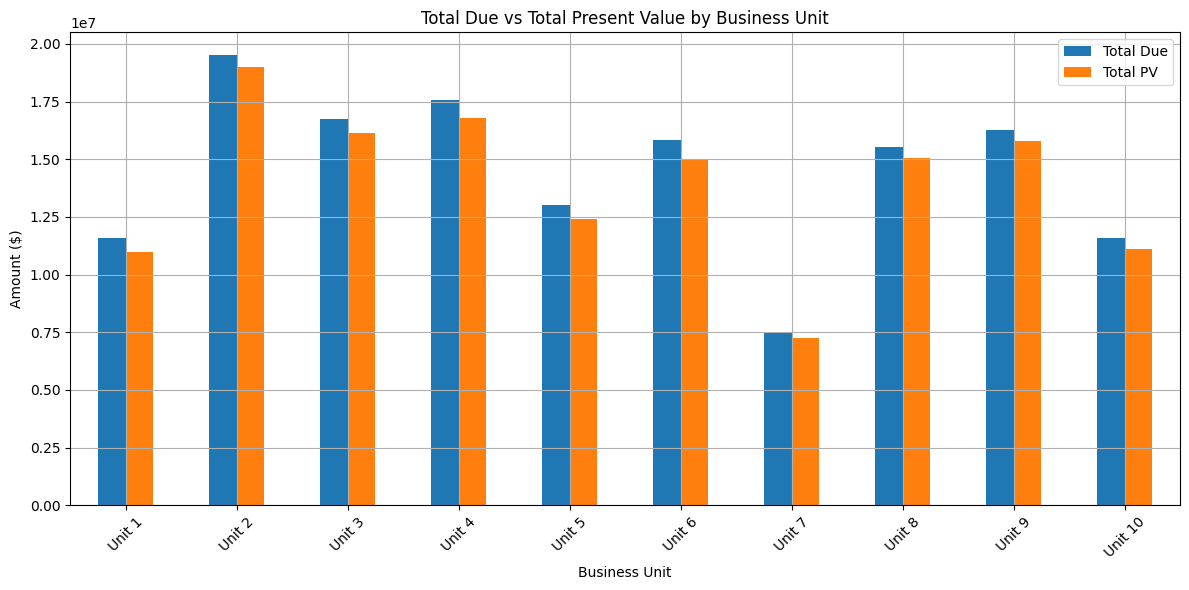

In [10]:
# lets plot and print the results
df.plot(x= 'Business Unit', y=['Total Due', 'Total PV'], kind='bar', figsize=(12, 6), title='Total Due vs Total Present Value by Business Unit')
#plt.title('Total Due vs Total Present Value by Business Unit')
plt.ylabel('Amount ($)')
plt.xlabel('Business Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()